In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
# 1. 数据预处理
# 读取数据
df = pd.read_csv('./anonymous-msweb.data', skiprows=7, header=None)

/var/folders/zs/_rd25w5j2ksgfxgty_jstgl00000gn/T/ipykernel_82229/2360474538.py:2: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./anonymous-msweb.data', skiprows=7, header=None)


In [4]:
# 去除引号和逗号
df = df.replace({'"':'', ',': ''}, regex=True)

In [5]:
df.head

<bound method NDFrame.head of         0      1      2                                3            4
0       A   1287      1          International AutoRoute   /autoroute
1       A   1288      1                          library     /library
2       A   1289      1  Master Chef Product Information  /masterchef
3       A   1297      1                  Central America    /centroam
4       A   1215      1         For Developers Only Info   /developer
...    ..    ...    ...                              ...          ...
131654  V   1035      1                              NaN          NaN
131655  V   1001      1                              NaN          NaN
131656  V   1018      1                              NaN          NaN
131657  C  42711  42711                              NaN          NaN
131658  V   1008      1                              NaN          NaN

[131659 rows x 5 columns]>

In [6]:
attribute_lines = df[df[0]=='A'] # 属性行
other_lines = df[df[0]!='A'] # 案例行
other_lines.head

<bound method NDFrame.head of         0      1      2    3    4
294     C  10001  10001  NaN  NaN
295     V   1000      1  NaN  NaN
296     V   1001      1  NaN  NaN
297     V   1002      1  NaN  NaN
298     C  10002  10002  NaN  NaN
...    ..    ...    ...  ...  ...
131654  V   1035      1  NaN  NaN
131655  V   1001      1  NaN  NaN
131656  V   1018      1  NaN  NaN
131657  C  42711  42711  NaN  NaN
131658  V   1008      1  NaN  NaN

[131365 rows x 5 columns]>

In [7]:
dic = {x[1]:x[3] for _,x in attribute_lines.iterrows()}
print(dic)

{1287: 'International AutoRoute', 1288: 'library', 1289: 'Master Chef Product Information', 1297: 'Central America', 1215: 'For Developers Only Info', 1279: 'Multimedia Golf', 1239: 'Microsoft Consulting', 1282: 'home', 1251: 'Reference Support', 1121: 'Microsoft Magazine', 1083: 'MS Access Support', 1145: 'Visual Fox Pro Support', 1276: 'Visual Test Support', 1200: 'Benelux Region', 1259: 'controls', 1155: 'Sidewalk', 1092: 'Visual FoxPro', 1004: 'Microsoft.com Search', 1057: 'MS PowerPoint News', 1140: 'Netherlands (Holland)', 1198: 'Picture It', 1147: 'Microsoft Financial Forum', 1005: 'Norway', 1026: 'Internet Site Construction for Developers', 1119: 'Corporation Information', 1216: 'Virtual Reality Markup Language', 1218: 'MS Publisher Support', 1205: 'Hardware Supprt', 1269: 'Customer Guides', 1031: 'MS Office', 1003: 'Knowledge Base', 1238: 'Excel Development', 1118: 'SQL Server', 1242: 'MS Garden', 1171: 'MS Merchant', 1175: 'MS Project Support', 1021: 'Visual C', 1222: 'MS Off

In [8]:
cases = []
votes = []
vote = []
case_id = 0
for i, line in other_lines.iterrows():
    if line[0]=='C':
        if len(vote)!=0:
            votes.append(vote)
            cases.append(case_id)
        vote = []
        case_id = line[1]
    else:
        vote.append(dic[line[1]])
votes.append(vote)
cases.append(case_id)
print(len(cases))
print(len(votes))

32711
32711


In [9]:
print(len(attribute_lines))
# 清洗数据，处理缺失值等
attribute_lines = attribute_lines.dropna()
print(len(attribute_lines))

294
294


In [10]:
# 2. 数据探索性分析
# 分析最常被访问的页面

counter = Counter()
# 统计每个子列表中出现的值
for sublist in votes:
    counter.update(sublist)

# 获取出现频率最高的前十个值及其出现次数
most_common_values = counter.most_common(10)

# 打印结果
for value, count in most_common_values:
    print(f"值: {value}，出现次数: {count}")

值: Free Downloads，出现次数: 10836
值: Internet Explorer，出现次数: 9383
值: Microsoft.com Search，出现次数: 8463
值: isapi，出现次数: 5330
值: Products ，出现次数: 5108
值: Windows Family of OSs，出现次数: 4628
值: Support Desktop，出现次数: 4451
值: Internet Site Construction for Developers，出现次数: 3220
值: Knowledge Base，出现次数: 2968
值: Web Site Builder's Gallery，出现次数: 2123


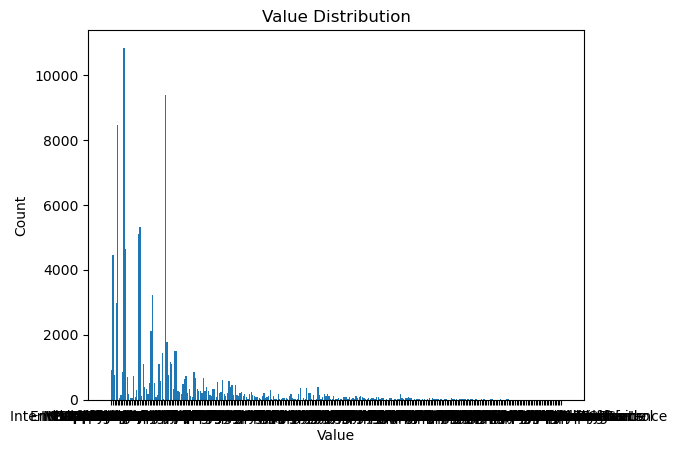

In [11]:
values = counter.keys()
counts = counter.values()

# 绘制柱状图
plt.bar(values, counts)

# 添加标题和轴标签
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Count')

# 显示图形
plt.show()

                  0
count    284.000000
mean     347.373239
std     1173.084272
min        1.000000
25%       10.000000
50%       46.000000
75%      187.500000
max    10836.000000


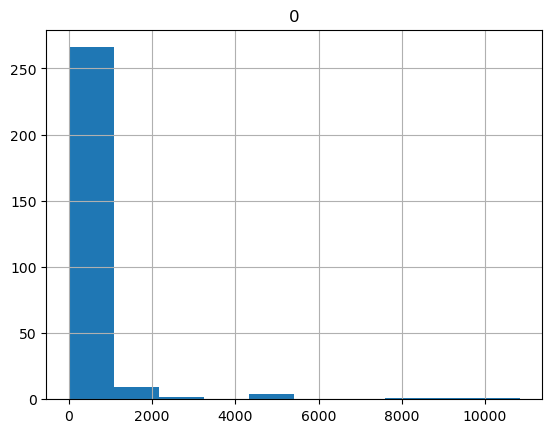

In [12]:
counts_df = pd.DataFrame(counts)
summary = counts_df.describe()

# 打印统计摘要信息
print(summary)
hist = counts_df.hist()

In [13]:
# 3. 关联规则挖掘
# 转换数据格式为TransactionEncoder所需的布尔矩阵形式
te = TransactionEncoder()
te_ary = te.fit_transform(votes)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 使用Apriori算法计算频繁项集
frequent_itemsets = apriori(df_encoded, min_support=0.07, use_colnames=True)

# 使用关联规则算法计算关联规则
association_results = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)


In [14]:
# 4. 结果评估
# 打印关联规则的支持度、置信度和提升度
print("关联规则：")
association_results = association_results[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print(association_results)

关联规则：
               antecedents          consequents   support  confidence  \
0         (Free Downloads)  (Internet Explorer)  0.160802    0.485419   
1      (Internet Explorer)     (Free Downloads)  0.160802    0.560588   
2  (Windows Family of OSs)     (Free Downloads)  0.077925    0.550778   
3                  (isapi)     (Free Downloads)  0.073064    0.448405   

       lift  
0  1.692267  
1  1.692267  
2  1.662652  
3  1.353616  


5. 结果分析与应用
根据分析结果提供导航结构优化建议等

针对以上实验结果，我们可以得到强相关规则：
1. Internet Explorer -> Free Downloads
2. Free Downloads -> Internet Explorer
3. Windows Family of OSs -> Free Downloads
4. isapi -> Free Downloads
可以看到Free Downloads的使用度很高，因此可以将其导航设置在更显眼更中心的位置；另外，Free Downloads与Internet Explorer关联度较高，可以将这两个导航设置地更靠近。